In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
## let's create synthetic data points

from sklearn.datasets import  make_regression

In [3]:
X,y=make_regression(n_samples=1000, n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[-0.66435357, -0.8851156 ],
       [-1.04071622, -0.15542535],
       [-0.22746221, -1.93224293],
       ...,
       [ 0.12485027,  0.10788772],
       [ 0.25424296, -1.06590996],
       [ 0.0120344 ,  1.4937571 ]])

In [5]:
y

array([-3.55972105e+01, -1.23563770e+01, -6.57090293e+01, -1.09057224e+02,
        7.06409747e+01,  9.48604504e+00,  4.45364736e+01,  1.79859254e+01,
       -3.84081578e+01,  2.35029900e+00,  2.31656037e+01, -1.06407871e+01,
        1.98080068e+01, -2.70078675e+01, -4.69577086e+01, -4.17007623e+01,
       -3.89297747e+01,  5.03613090e+01,  3.22850255e+01, -1.48261963e+01,
       -3.45968638e+01, -2.13066558e+01,  4.47523985e+00,  4.22353594e+01,
       -2.29622054e+01, -1.61514525e+01,  6.65956288e-01, -1.66457066e+00,
       -6.32937952e+01,  4.70077008e+01, -3.64433342e+01,  1.15009132e+01,
        1.18861192e+01, -5.65569203e+01, -9.30861870e+01, -5.14844141e+01,
       -3.16928722e+00,  2.47997800e+01,  2.72831107e+01,  7.03301857e+01,
        9.07454141e+01,  3.84679513e+01, -4.79174463e+01, -3.58653250e+01,
        3.04806806e+01,  1.46548034e+01,  2.55607818e+01, -6.16066414e+01,
       -3.59875715e+00,  6.95270378e+00, -1.13657513e+01, -5.78253651e+00,
        4.81924380e+01,  

In [6]:
pd.DataFrame(X)[0]

0     -0.664354
1     -1.040716
2     -0.227462
3     -1.705233
4      0.658490
         ...   
995    0.990439
996   -1.219977
997    0.124850
998    0.254243
999    0.012034
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

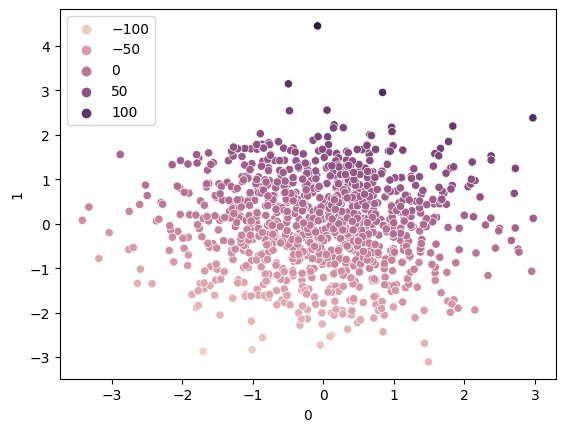

In [16]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [9]:
from sklearn.model_selection import train_test_split

In [12]:
X_train , X_test , y_train , y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [13]:
from sklearn.svm import SVR

In [17]:
svr = SVR(kernel='linear')

In [18]:
svr

SVR(kernel='linear')

In [20]:
svr.fit(X_train , y_train)

SVR(kernel='linear')

In [21]:
svr.coef_

array([[10.16895489, 32.74495394]])

In [22]:
## prediction 

y_pred = svr.predict(X_test)

In [23]:
y_pred

array([  8.91078268,  -0.31795819,   3.54780217,  -7.92822108,
       -10.31327533, -40.55814376,   9.67800067,  -1.33185532,
       -13.44089828,   6.31308199, -19.08126279, -21.67643671,
         5.99775295, -59.92066529,  72.38281552, -13.31260388,
        -4.63867538, -12.40152869, -61.37955173, -45.92301896,
        -2.28393133,   9.32916955, -60.18127118,  19.58272727,
       -18.18935349, -34.9294505 ,   2.63457209, -64.53087164,
         1.67668771,  -7.72333402, -10.65596377, -35.52942603,
        21.91913829, -31.00579348, -46.27018054,  18.73749176,
        31.50459239,  98.06918299, -33.88392486,  43.50981905,
       -55.90383166,  17.87922709,  35.13516715,   9.40579192,
         9.51803295, -14.56265438,  48.51347284,   2.10783845,
        13.58492193, -26.87836979,   2.3960367 ,  20.98099443,
        -4.23913504,  17.22446746, -10.78899165, -30.68182418,
       -10.25330747,  -8.21564877,  47.23711503,   4.08321455,
        25.43289609,  29.90045122,  29.91535848,  -8.75

In [24]:
from sklearn.metrics import r2_score

In [25]:
print(r2_score(y_test , y_pred))

0.9913235683705652


## Hypermeter Tuning With SVC

In [26]:
from sklearn.model_selection import GridSearchCV

In [29]:
## defining parameter range

param_grid = {'C':[0.1,1,10,100,1000],
             'gamma':[1,0.1,0.01,0.001,0.0001],
             'kernel':['linear'],
             'epsilon':[0.1,0.2,0.3]}

In [30]:
param_grid

{'C': [0.1, 1, 10, 100, 1000],
 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
 'kernel': ['linear'],
 'epsilon': [0.1, 0.2, 0.3]}

In [32]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [33]:
grid

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [34]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.989 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.989 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.989 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.989 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.989 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.989 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

[CV 2/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.994 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.992 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.993 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.001, kernel=linear;, score=0.992 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.993 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.994 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.992 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.993 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=0.992 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.993 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=0.994 total time=   0.0s
[C

[CV 4/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.993 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=0.993 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.993 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.994 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.992 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.993 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=0.993 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.993 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.994 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.992 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.001, kernel=linear;, score=0.993 total time=   0.

[CV 5/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=0.993 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.993 total time=   0.1s
[CV 2/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.994 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.992 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.993 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=0.993 total time=   0.0s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.993 total time=   0.1s
[CV 2/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.994 total time=   0.0s
[CV 3/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.992 total time=   0.0s
[CV 4/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.993 total time=   0.0s
[CV 5/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=0.993 total time=   0.0s
[CV 1/

[CV 4/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.993 total time=   0.8s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=0.993 total time=   1.2s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.993 total time=   1.1s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.994 total time=   1.0s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.992 total time=   0.9s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.993 total time=   0.8s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.001, kernel=linear;, score=0.993 total time=   1.2s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.993 total time=   1.0s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.994 total time=   1.0s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=0.992 total time=   0.9s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=line

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [35]:
grid.best_params_

{'C': 100, 'epsilon': 0.3, 'gamma': 1, 'kernel': 'linear'}

In [38]:
## prediction 

y_pred=grid.predict(X_test)
print(r2_score(y_test , y_pred))


0.9914942045748365
